In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Pigi_ML_Data.csv', skipinitialspace=True)
features = df.columns[:-1]
target = df.columns[-1]
df

,Long,Base MD,VR Mean
0,-47.957358,1740.0,0.33
1,-47.957358,1920.0,0.39
2,-47.957358,2730.0,0.42
3,-47.957358,3990.0,0.49
4,-47.957358,4410.0,0.59
...,...,...,...
273,-48.282384,2460.0,0.45
274,-48.282384,2560.0,0.47
275,-48.282384,2740.0,0.49
276,-48.282384,3580.0,0.67


In [3]:
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import train_test_split

model = GradientBoostingRegressor()
X, y = df[features].values, df[target].values
ind = [i for i in range(df.shape[0])]
X_train, X_test, y_train, y_test, i_train, i_test = train_test_split(X, y, ind,
    train_size=0.6, random_state=100)
model.fit(X_train,(y_train))

GradientBoostingRegressor()

In [4]:
groups = ['Test' if i in set(i_test) else 'Training' for i in ind]
predictions = model.predict(X)
res = [obs - pred for (obs, pred) in zip(df[target].values, predictions)]

outcomes_df = pd.DataFrame({
        'Target': df[target].values,
        'Prediction': predictions,
        'Group': groups,
        'Residual': res
    })

outcomes_df

,Target,Prediction,Group,Residual
0,0.33,0.335577,Training,-0.005577
1,0.39,0.381971,Test,0.008029
2,0.42,0.438765,Training,-0.018765
3,0.49,0.893952,Test,-0.403952
4,0.59,0.649983,Training,-0.059983
...,...,...,...,...
273,0.45,0.464936,Training,-0.014936
274,0.47,0.468807,Training,0.001193
275,0.49,0.468807,Training,0.021193
276,0.67,0.773608,Test,-0.103608


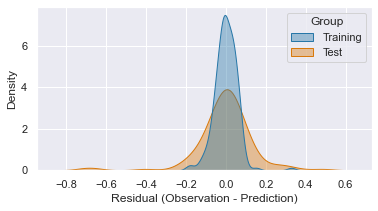

In [5]:
from matplotlib.figure import Figure
test_colour = (217/255, 121/255, 11/255)
train_colour = (39/255, 119/255, 168/255)

def plot_residual_histogtam(df, figsize=(6, 3)) -> Figure:
    sns.set()
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.set_theme(style='darkgrid')
    
    sns.kdeplot(data=df, 
                x="Residual",
                hue="Group",
                alpha=0.4,
                multiple='layer',
                fill=True,
                common_norm=False,
                palette={'Test': test_colour, 'Training': train_colour},
                #cut=0
               )

    ax.set(xlabel ="Residual (Observation - Prediction)")

    #return fig

plot_residual_histogtam(outcomes_df)

In [6]:
outcomes_df.groupby(['Group'])['Residual'].mean()

Group
Test       -5.143693e-03
Training   -3.578128e-17
Name: Residual, dtype: float64

In [7]:
outcomes_df.groupby(['Group'])['Prediction'].mean()

Group
Test        0.663447
Training    0.687530
Name: Prediction, dtype: float64